In [1]:
# ** COMP309 Project **
# Johniel Bocacao
# 300490028

###
# Step 0: Load data
###

import os
import torch
from PIL import Image
from torchvision.transforms import ToTensor

base_dir = "traindata"
train_list = []
y_train = []
throwaway = []
for class_type in sorted(os.listdir(base_dir)):
    if class_type == ".DS_Store": continue
    subdir = os.path.join(base_dir, class_type)
    for filename in sorted(os.listdir(subdir)):
        if filename == ".DS_Store": continue
        filepath = os.path.join(subdir, filename)
        image = ToTensor()(Image.open(filepath)).unsqueeze(0)
        if list(image.size())[1:] == [3, 300, 300]:
            train_list.append(image)
            y_train.append(class_type)
        else:
            print(filepath, "is not size 300x300, image is:", image.size())
            throwaway.append(image)

X_train = torch.Tensor((len(train_list), 3, 300, 300))
torch.cat(train_list, out=X_train)

traindata/cherry/cherry_0113.jpg is not size 300x300, image is: torch.Size([1, 3, 230, 219])
traindata/cherry/cherry_0226.jpg is not size 300x300, image is: torch.Size([1, 3, 169, 299])
traindata/cherry/cherry_0257.jpg is not size 300x300, image is: torch.Size([1, 3, 229, 220])
traindata/cherry/cherry_0366.jpg is not size 300x300, image is: torch.Size([1, 3, 193, 261])
traindata/cherry/cherry_0519.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0549.jpg is not size 300x300, image is: torch.Size([1, 3, 251, 201])
traindata/cherry/cherry_0745.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0843.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0873.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_1005.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_1017.jpg is not size 300x300, image is: torch.

tensor([[[[0.0353, 0.0196, 0.0118,  ..., 0.3647, 0.3647, 0.3608],
          [0.0275, 0.0196, 0.0118,  ..., 0.3647, 0.3686, 0.3647],
          [0.0196, 0.0196, 0.0157,  ..., 0.3686, 0.3686, 0.3647],
          ...,
          [0.2745, 0.2863, 0.2980,  ..., 0.5882, 0.5843, 0.5843],
          [0.2980, 0.3059, 0.3176,  ..., 0.5725, 0.5686, 0.5686],
          [0.3098, 0.3216, 0.3294,  ..., 0.5647, 0.5608, 0.5569]],

         [[0.0039, 0.0000, 0.0000,  ..., 0.3882, 0.3804, 0.3765],
          [0.0000, 0.0000, 0.0000,  ..., 0.3882, 0.3843, 0.3804],
          [0.0000, 0.0000, 0.0078,  ..., 0.3922, 0.3843, 0.3804],
          ...,
          [0.2902, 0.3020, 0.3137,  ..., 0.5608, 0.5529, 0.5529],
          [0.3137, 0.3216, 0.3333,  ..., 0.5451, 0.5412, 0.5373],
          [0.3255, 0.3373, 0.3451,  ..., 0.5373, 0.5333, 0.5294]],

         [[0.0627, 0.0431, 0.0275,  ..., 0.2392, 0.2353, 0.2314],
          [0.0549, 0.0431, 0.0275,  ..., 0.2392, 0.2392, 0.2353],
          [0.0431, 0.0353, 0.0275,  ..., 0

In [4]:
print("X_train =", X_train.size()[0])
print("y_train =", len(y_train))
print(len(throwaway), "images thrown out")

X_train = 4439
y_train = 4439
61 images thrown out


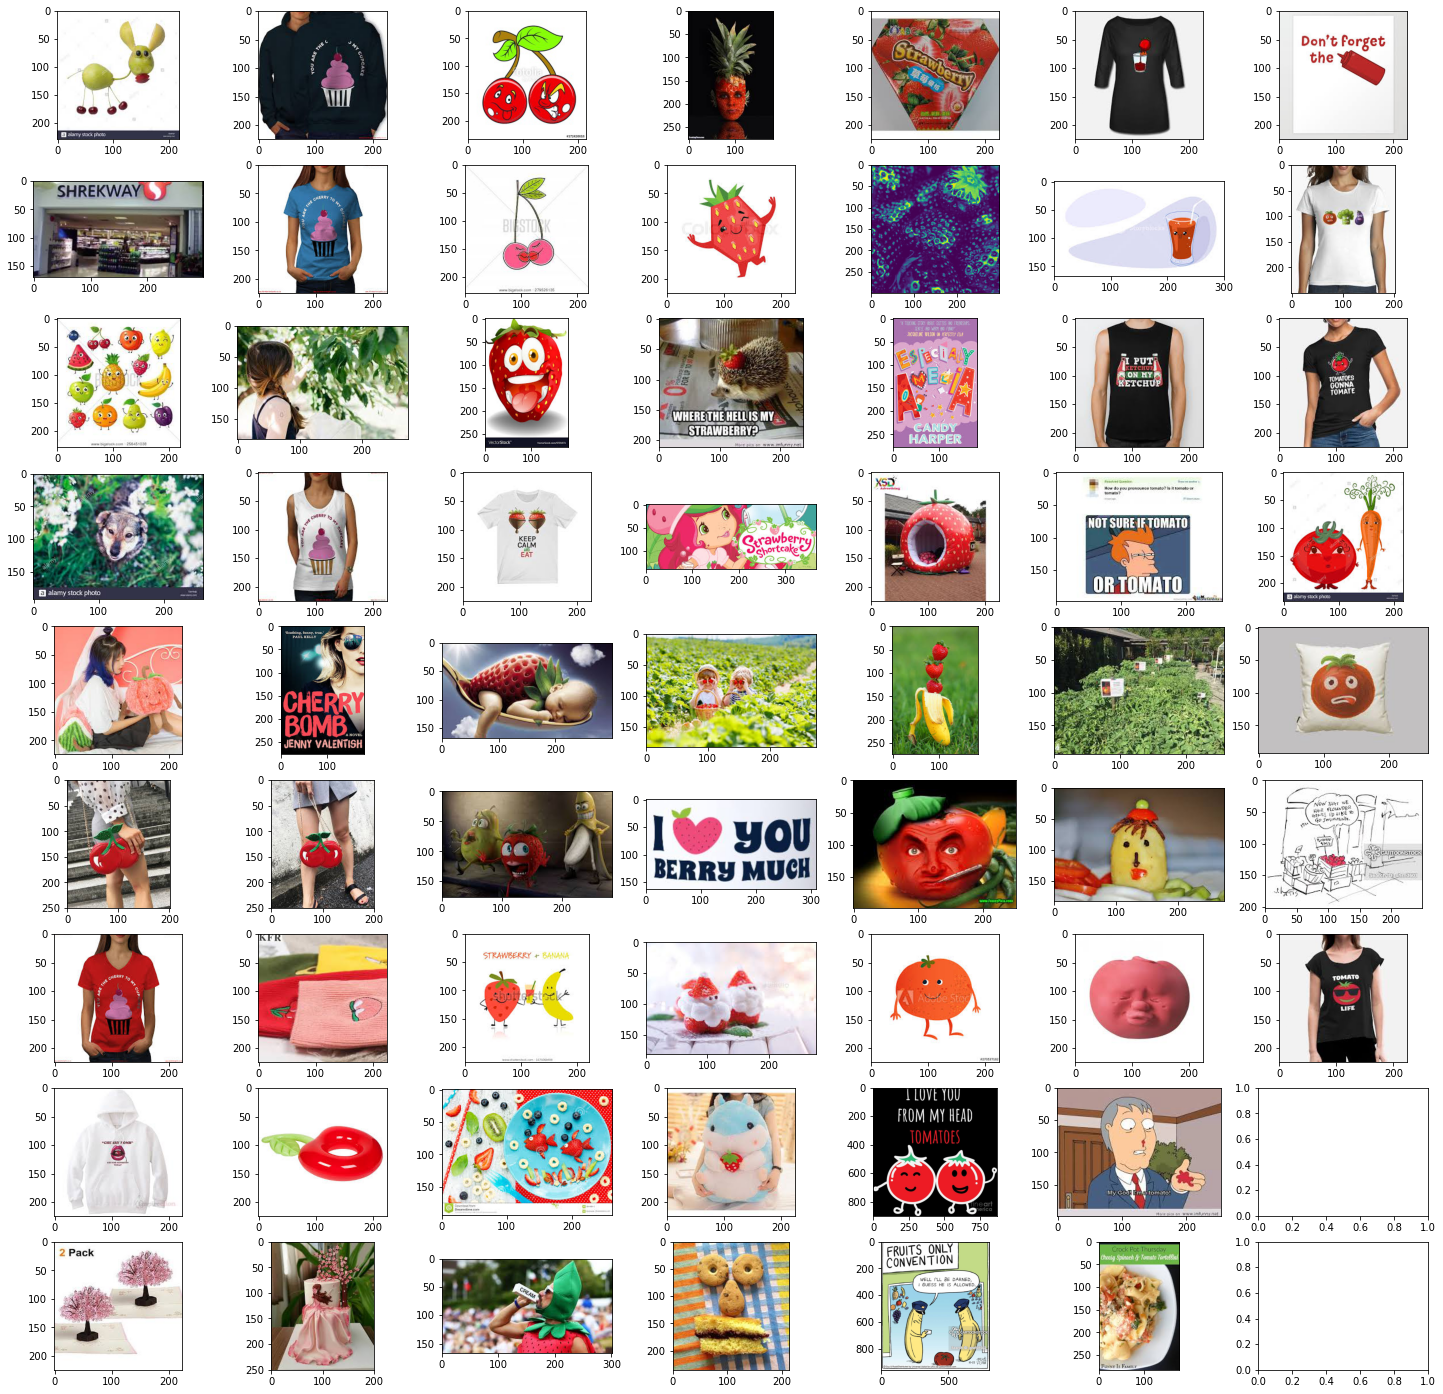

In [133]:
from matplotlib import pyplot as plt

def show_image(img, ax=plt, title=""):
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(title)

fig, ax = plt.subplots(9,7, figsize=(25,25))
for i, image in enumerate(throwaway):
    show_image(image[0], ax=ax[i%9, i//9])

In [123]:
from torchvision.transforms import Normalize
import numpy as np

norm = Normalize(0.5, 0.5)

def show_channel(img, ax=plt, title=""):
    npimg = img.numpy()
    ax.imshow(npimg, cmap="gray")
    ax.set_title(title)

def plot_image_channels(img_tensor):
    fig, ax = plt.subplots(2,4, figsize=(10,5))
    show_image(img_tensor, ax[0,0], title="RGB")
    red = img_tensor[0]
    show_channel(red, ax[0, 1], title="Red")
    green = img_tensor[1]
    show_channel(green, ax[0, 2], title="Green")
    blue = img_tensor[2]
    show_channel(blue, ax[0, 3], title="Blue")
    greyscale = (red + green + blue) / 3
    show_channel(greyscale, ax[1,0], title="Greyscale")
    rg_diff = (red - green) / 2 + 0.5
    show_channel(rg_diff, ax[1,1], title="R-G difference")
    rb_diff = (red - blue) / 2 + 0.5
    show_channel(rb_diff, ax[1,2], title="R-B difference")
    gb_diff = (green - blue) / 2 + 0.5
    show_channel(gb_diff, ax[1,3], title="G-B difference")
    fig.tight_layout()

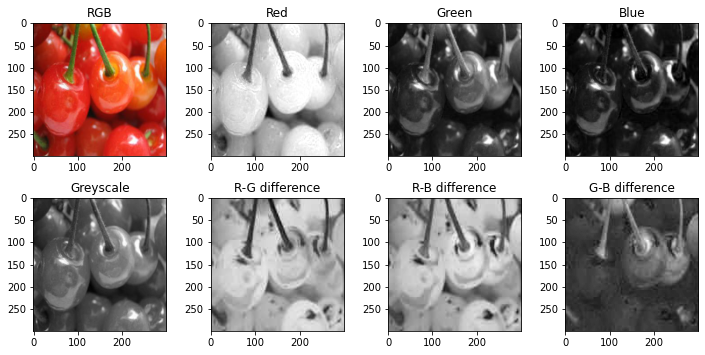

In [124]:
plot_image_channels(X_train[y_train.index('cherry') + 6])

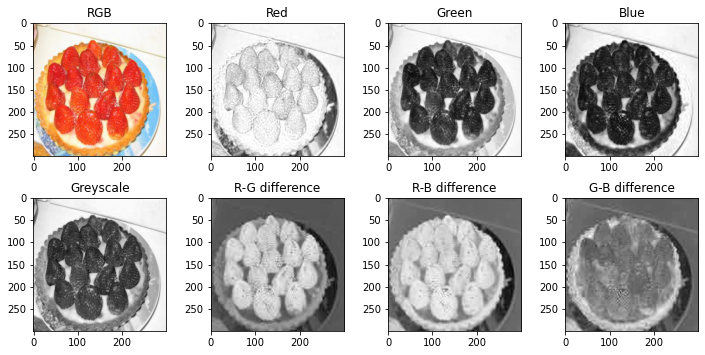

In [92]:
plot_image_channels(X_train[y_train.index('strawberry') + 4])

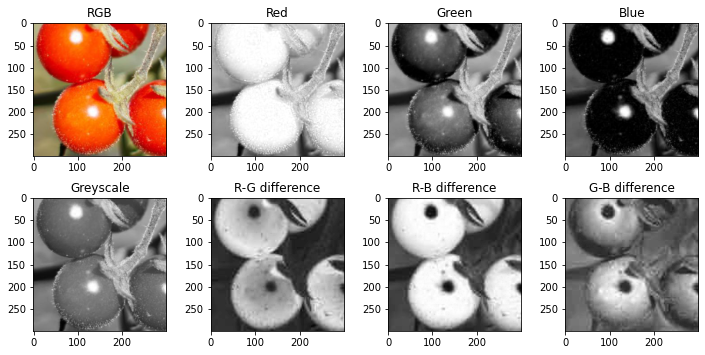

In [96]:
plot_image_channels(X_train[y_train.index('tomato') + 9])